# **Introduction**

In this case study, we have created models that can automatically classify customer complaints based on the products and services that the ticket mentions.

## **Understanding Problem Statement**

For a financial company, customer complaints carry a lot of importance, as they are often an indicator of the shortcomings in their products and services. If these complaints are resolved efficiently in time, they can bring down customer dissatisfaction to a minimum and retain them with stronger loyalty. This also gives them an idea of how to continuously improve their services to attract more customers.



These customer complaints are unstructured text data; so, traditionally, companies need to allocate the task of evaluating and assigning each ticket to the relevant department to multiple support employees. This becomes tedious as the company grows and has a large customer base.



In this case study, you will be working as an NLP engineer for a financial company that wants to automate its customer support tickets system. As a financial company, the firm has many products and services such as credit cards, banking and mortgages/loans.

## **Business goal**



We need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF <b> Non-Negative Matrix Factorization </b> to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.


##### **Pipelines that needs to be performed:**

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading
2. Text preprocessing
3. Exploratory data analysis (EDA)
4. Feature extraction
5. Topic modelling
6. Model building using supervised learning
7. Model training and evaluation
8. Model inference

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# NLP
import en_core_web_sm
nlp = en_core_web_sm.load()

import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

# Format Notebook
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)

import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# importing the Data
data=json.load(open('/content/drive/MyDrive/Learnbay/Automatic Ticket Classification/ticket_complaints.json'))
data=pd.json_normalize(data)

In [3]:
data.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [4]:
# Extracting only required data
data=data[['_source.complaint_what_happened','_source.product','_source.sub_product']]
data.head()

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [5]:
data.shape

(78313, 3)

In [6]:
# Renaming the columns
data.rename(columns={
    '_source.complaint_what_happened':'complaint_text',
    '_source.product':'category',
    '_source.sub_product': 'sub-category'
},inplace=True)
data.head()

,complaint_text,category,sub-category
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [7]:
# Merging the sub-cat and category column for easier verification in future
data['category']=data['category']+' + '+data['sub-category']
data.drop('sub-category',axis=1,inplace=True)
data.head()

,complaint_text,category
0,,Debt collection + Credit card debt
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection + Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card + General-purpose credit card or charge card
3,,Mortgage + Conventional home mortgage
4,,Credit card or prepaid card + General-purpose credit card or charge card


In [8]:
# Checking null values
data.isna().sum()

,0
complaint_text,0
category,10571


###### Wrong Here, We can clearly see null values in complaint_text

In [9]:
# Empty Complaints
len(data[data['complaint_text']==''])

57241

In [10]:
# droping data with empty comments
data=data[data['complaint_text']!='']
data.shape

(21072, 2)

In [11]:
# Rechecking null values
len(data[data['complaint_text']==''])

0

### **Prepare the text for topic modeling**

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [12]:
# function to clean the text
def clean_text(text):
    text = text.lower()    # lower case
    text = text.replace("chase", "")              # removing chase word
    text = re.sub('\[\S+\]', '', text).strip()    # remove text in square bracket
    text = text.translate(str.maketrans('', '', string.punctuation))     # remove punctuation
    text = re.sub('\S*\d\S*', '', text).strip()   # remove words containing the number
    text = re.sub(r'\b\w*xx\w*\b', '', text).strip()  # remove PII data
    return text.strip()

In [13]:
data['complaint_text']=data['complaint_text'].apply(lambda x:clean_text(x))
data.head()

,complaint_text,category
1,good morning my name is and i appreciate it if you could help me put a stop to bank cardmember services \nin i wrote to asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\n account thanks in advance for your help,Debt collection + Credit card debt
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,Credit card or prepaid card + General-purpose credit card or charge card
10,card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,"Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report"
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to bank i then immediately contacted bank within no more than of getting the notification on the screen and i was told by the representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to pur the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the representative did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,"Credit reporting, credit repair services, or other personal consumer reports + Credit reporting"
14,my grand son give me check for i deposit it into my account after fund clear my bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my bank refuse to pay me my money my grand son called times they told him i should call not him to verify the check owner he is out the country most the time date happen check number claim number is with,Checking or savings account + Checking account


In [14]:
# Lemmatizing , removing stopwords
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    lemma = WordNetLemmatizer().lemmatize
    return ' '.join([lemma(word) for word in text.split() if word.lower() not in set(stopwords)])

In [15]:
data['lemma']=data['complaint_text'].apply(lambda x:lemmatizer(x))
data.head()

,complaint_text,category,lemma
1,good morning my name is and i appreciate it if you could help me put a stop to bank cardmember services \nin i wrote to asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\n account thanks in advance for your help,Debt collection + Credit card debt,good morning appreciate help stop bank cardmember service wrote asking debt verification sent statement acceptable asking bank validate debt instead receiving mail month attempting collect debt right know information consumer account thanks advance help
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,Credit card or prepaid card + General-purpose credit card or charge card,upgraded card told agent upgrade anniversary date change turned agent giving wrong information order upgrade account changed anniversary date consent recording agent misled
10,card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,"Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card reported fraudulent application submitted identity consent fraudulently obtain service extend credit verifying identity applicant
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to bank i then immediately contacted bank within no more than of getting the notification on the screen and i was told by the representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to pur the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the representative did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,"Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",trying book ticket came offer applied ticket applied reward card information offer minute notified screen decision immediately contacted referred bank immediately contacted bank getting notification screen told representative spoke application denied state asked information offer explained approved credit offer get applied account statement pur ticket explicitly told glad got denied absolutely longer interested account asked application withdrawn representative obliged happened later putting application notwithstanding explicit request proceed application contrary told representative fact ahead open credit account reported credit report refused correct information credit report went ahead process application consent error
14,my grand son give me check for i deposit it into

In [16]:
# Clean data
data_clean=data[['category','complaint_text','lemma']]
data.head()

,complaint_text,category,lemma
1,good morning my name is and i appreciate it if you could help me put a stop to bank cardmember services \nin i wrote to asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\n account thanks in advance for your help,Debt collection + Credit card debt,good morning appreciate help stop bank cardmember service wrote asking debt verification sent statement acceptable asking bank validate debt instead receiving mail month attempting collect debt right know information consumer account thanks advance help
2,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,Credit card or prepaid card + General-purpose credit card or charge card,upgraded card told agent upgrade anniversary date change turned agent giving wrong information order upgrade account changed anniversary date consent recording agent misled
10,card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,"Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card reported fraudulent application submitted identity consent fraudulently obtain service extend credit verifying identity applicant
11,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to bank i then immediately contacted bank within no more than of getting the notification on the screen and i was told by the representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to pur the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the representative did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,"Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",trying book ticket came offer applied ticket applied reward card information offer minute notified screen decision immediately contacted referred bank immediately contacted bank getting notification screen told representative spoke application denied state asked information offer explained approved credit offer get applied account statement pur ticket explicitly told glad got denied absolutely longer interested account asked application withdrawn representative obliged happened later putting application notwithstanding explicit request proceed application contrary told representative fact ahead open credit account reported credit report refused correct information credit report went ahead process application consent error
14,my grand son give me check for i deposit it into

In [17]:
# Extracting POS( VB >>>>> Verb, NN >>>>> Noun)
def extract_pos(text):
  tokens=word_tokenize(text)
  tagged=pos_tag(tokens)
  sent=[word for word,tag in tagged if tag.startswith('VB') or tag.startswith('NN')]
  return ' '.join(sent)

In [18]:
data_clean['pos_text']=data_clean['lemma'].apply(lambda x: extract_pos(x))
data_clean.head()

,category,complaint_text,lemma,pos_text
1,Debt collection + Credit card debt,good morning my name is and i appreciate it if you could help me put a stop to bank cardmember services \nin i wrote to asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\n account thanks in advance for your help,good morning appreciate help stop bank cardmember service wrote asking debt verification sent statement acceptable asking bank validate debt instead receiving mail month attempting collect debt right know information consumer account thanks advance help,morning appreciate help stop bank cardmember service wrote asking debt verification sent statement asking bank debt receiving month attempting debt right know information consumer account thanks advance help
2,Credit card or prepaid card + General-purpose credit card or charge card,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,upgraded card told agent upgrade anniversary date change turned agent giving wrong information order upgrade account changed anniversary date consent recording agent misled,card told agent date change turned giving information order upgrade account changed date consent recording agent misled
10,"Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,card reported fraudulent application submitted identity consent fraudulently obtain service extend credit verifying identity applicant,card reported application submitted identity consent obtain service extend credit verifying identity applicant
11,"Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to bank i then immediately contacted bank within no more than of getting the notification on the screen and i was told by the representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to pur the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the representative did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,trying book ticket came offer applied ticket applied reward card information offer minute notified screen decision immediately contacted referred bank immediately contacted bank getting notification screen told representative spoke application denied state asked information offer explained approved credit offer get applied account st

# Exploratory Data Analysis

### **Exploratory data analysis to get familiar with the data.**

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [19]:
# Find len of complaint_text for each comment
data_clean['len']=data_clean.complaint_text.apply(len)
data_clean.head()

,category,complaint_text,lemma,pos_text,len
1,Debt collection + Credit card debt,good morning my name is and i appreciate it if you could help me put a stop to bank cardmember services \nin i wrote to asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\n account thanks in advance for your help,good morning appreciate help stop bank cardmember service wrote asking debt verification sent statement acceptable asking bank validate debt instead receiving mail month attempting collect debt right know information consumer account thanks advance help,morning appreciate help stop bank cardmember service wrote asking debt verification sent statement asking bank debt receiving month attempting debt right know information consumer account thanks advance help,436
2,Credit card or prepaid card + General-purpose credit card or charge card,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,upgraded card told agent upgrade anniversary date change turned agent giving wrong information order upgrade account changed anniversary date consent recording agent misled,card told agent date change turned giving information order upgrade account changed date consent recording agent misled,305
10,"Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,card reported fraudulent application submitted identity consent fraudulently obtain service extend credit verifying identity applicant,card reported application submitted identity consent obtain service extend credit verifying identity applicant,204
11,"Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to bank i then immediately contacted bank within no more than of getting the notification on the screen and i was told by the representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to pur the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the representative did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,trying book ticket came offer applied ticket applied reward card information offer minute notified screen decision immediately contacted referred bank immediately contacted bank getting notification screen told representative spoke application denied state asked information offer explained approved credit offer get ap

In [20]:
data_clean['len'].describe()

,len
count,21072.000000
mean,1259.120634
std,1368.455234
min,0.000000
25%,474.750000
50%,894.000000
75%,1584.000000
max,29980.000000


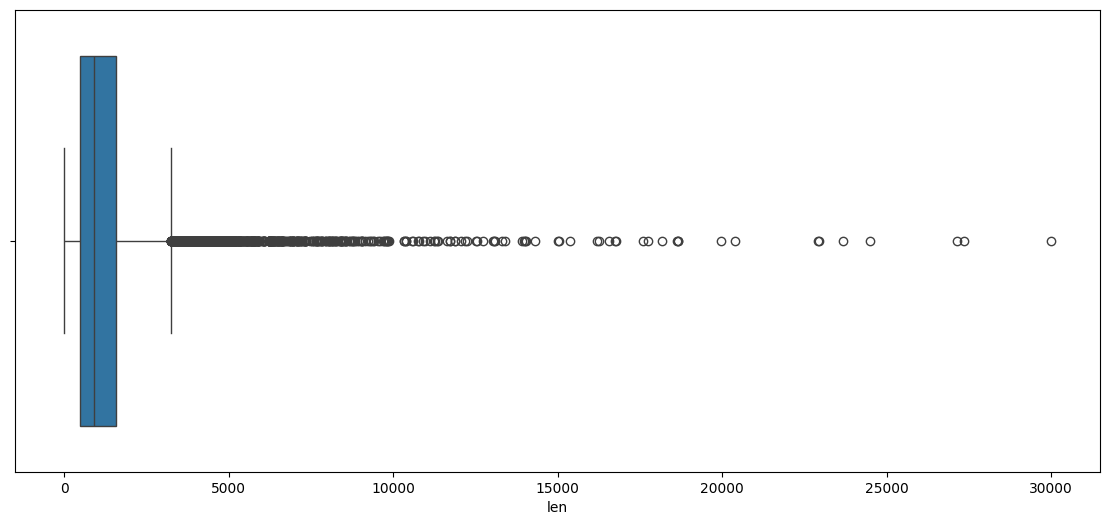

In [21]:
# Visualise the length of text
plt.figure(figsize=(14,6))
sns.boxplot(data=data_clean,x=data_clean['len'],orient='h')
plt.show()

In [22]:
# WordCloud for top 50 words
from wordcloud import WordCloud
def word_cloud_gen(text,top=50):
  plt.figure(figsize=(10,6))
  wc_plot=WordCloud(background_color='white',max_words=top).generate(str(text))
  plt.imshow(wc_plot)

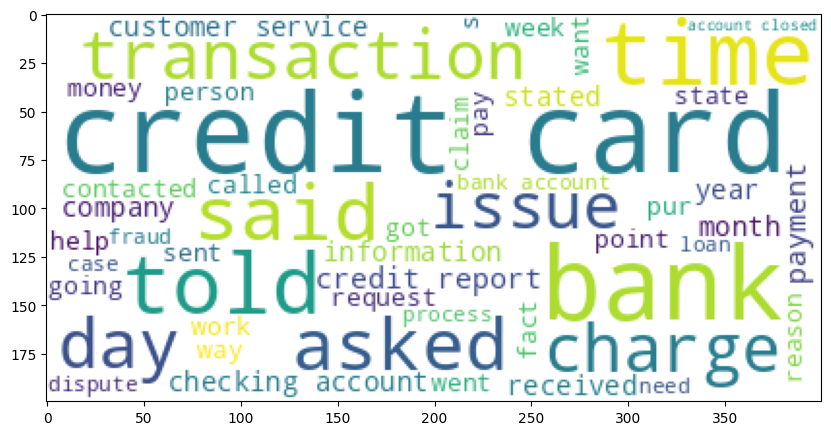

In [23]:
word_cloud_gen(data_clean['pos_text'])

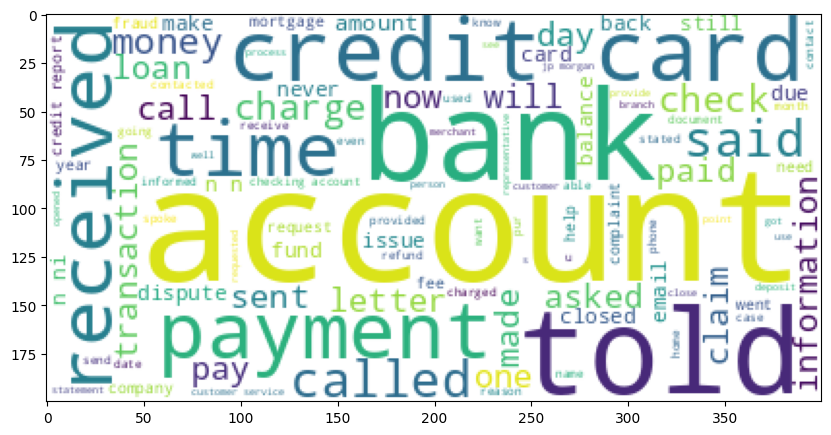

In [24]:
# Top 100 Words
word_cloud_gen(data_clean['complaint_text'],100)

# UNIGRAM, BIGRAM, TRIGRAMS

In [25]:
# Function for n_grams
def top_n_grams(text,n_gram=1,top=30):
  vec=CountVectorizer(stop_words='english',ngram_range=((n_gram,n_gram)))
  words=vec.fit_transform(text)
  sum_words=words.sum(axis=0)
  word_freq=[(word,sum_words[0,i]) for word,i in vec.vocabulary_.items()]
  word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
  return word_freq[:top]

In [26]:
# top 30 Unigram
top_30_uni=top_n_grams(data_clean['pos_text'])
top_30_bi=top_n_grams(data_clean['pos_text'],n_gram=2)
top_30_tri=top_n_grams(data_clean['pos_text'],n_gram=3)

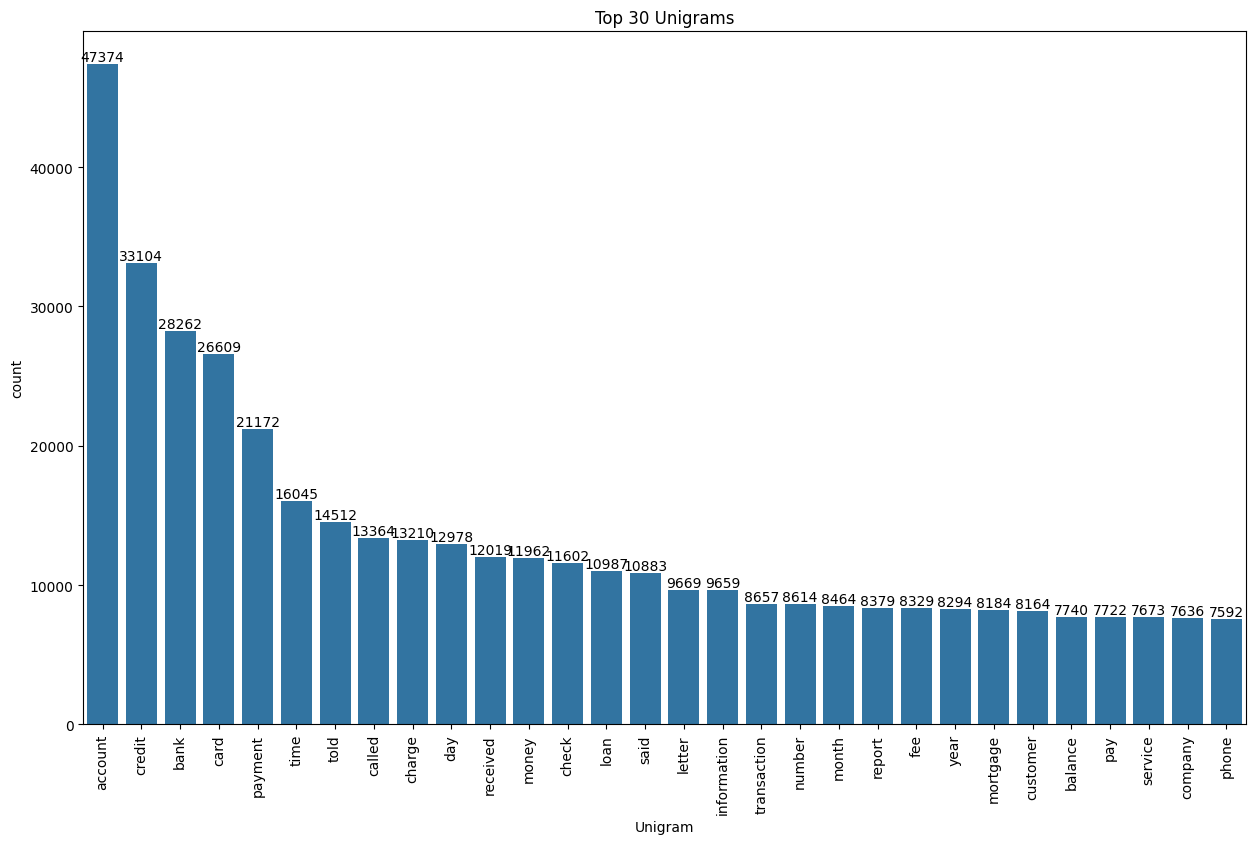

In [27]:
# Ploting unigram
df_temp=pd.DataFrame(top_30_uni,columns=['Unigram','count'])
plt.figure(figsize=(15,9))
ax=sns.barplot(data=df_temp,x='Unigram',y='count')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 30 Unigrams')
plt.show()

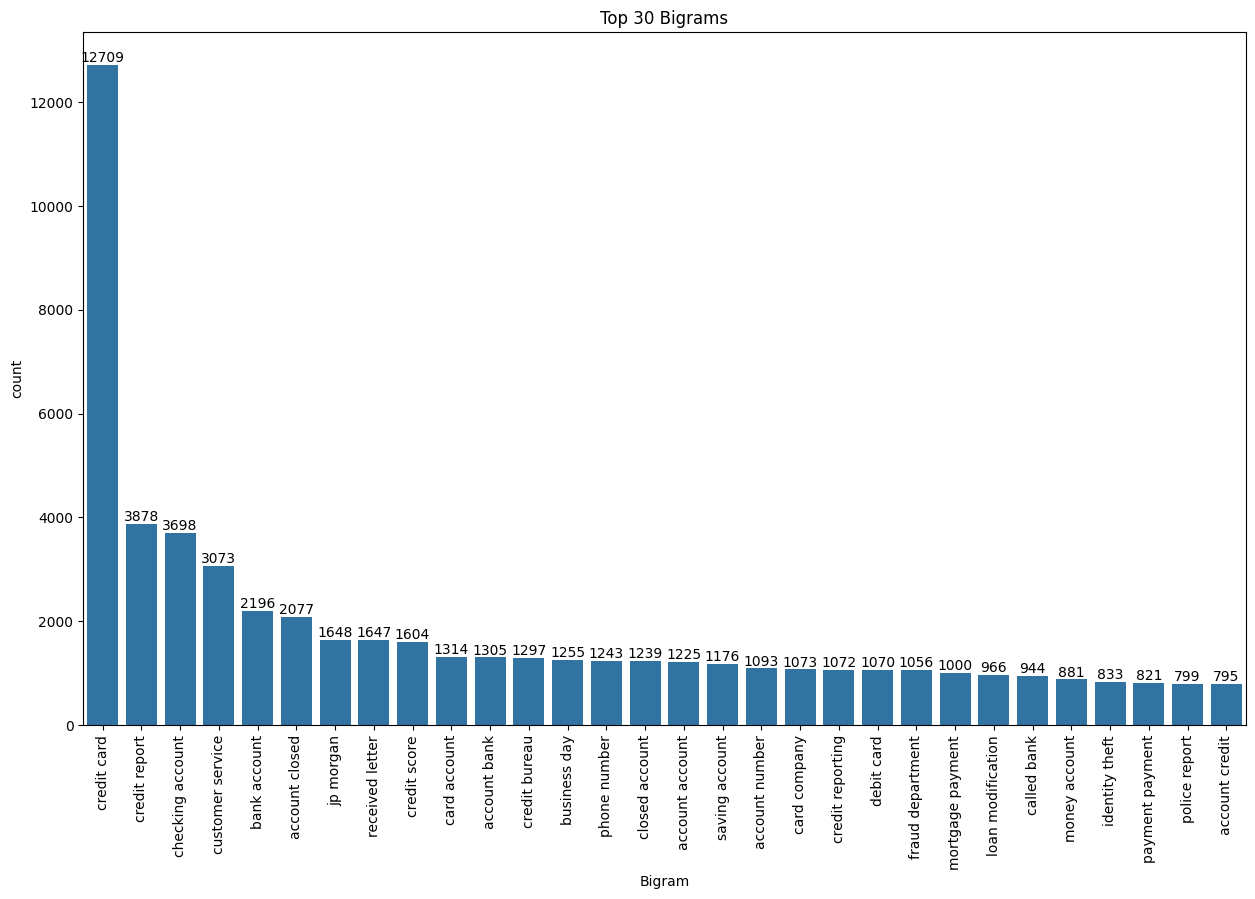

In [28]:
# Ploting biigram
df_temp=pd.DataFrame(top_30_bi,columns=['Bigram','count'])
plt.figure(figsize=(15,9))
ax=sns.barplot(data=df_temp,x='Bigram',y='count')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 30 Bigrams')
plt.show()

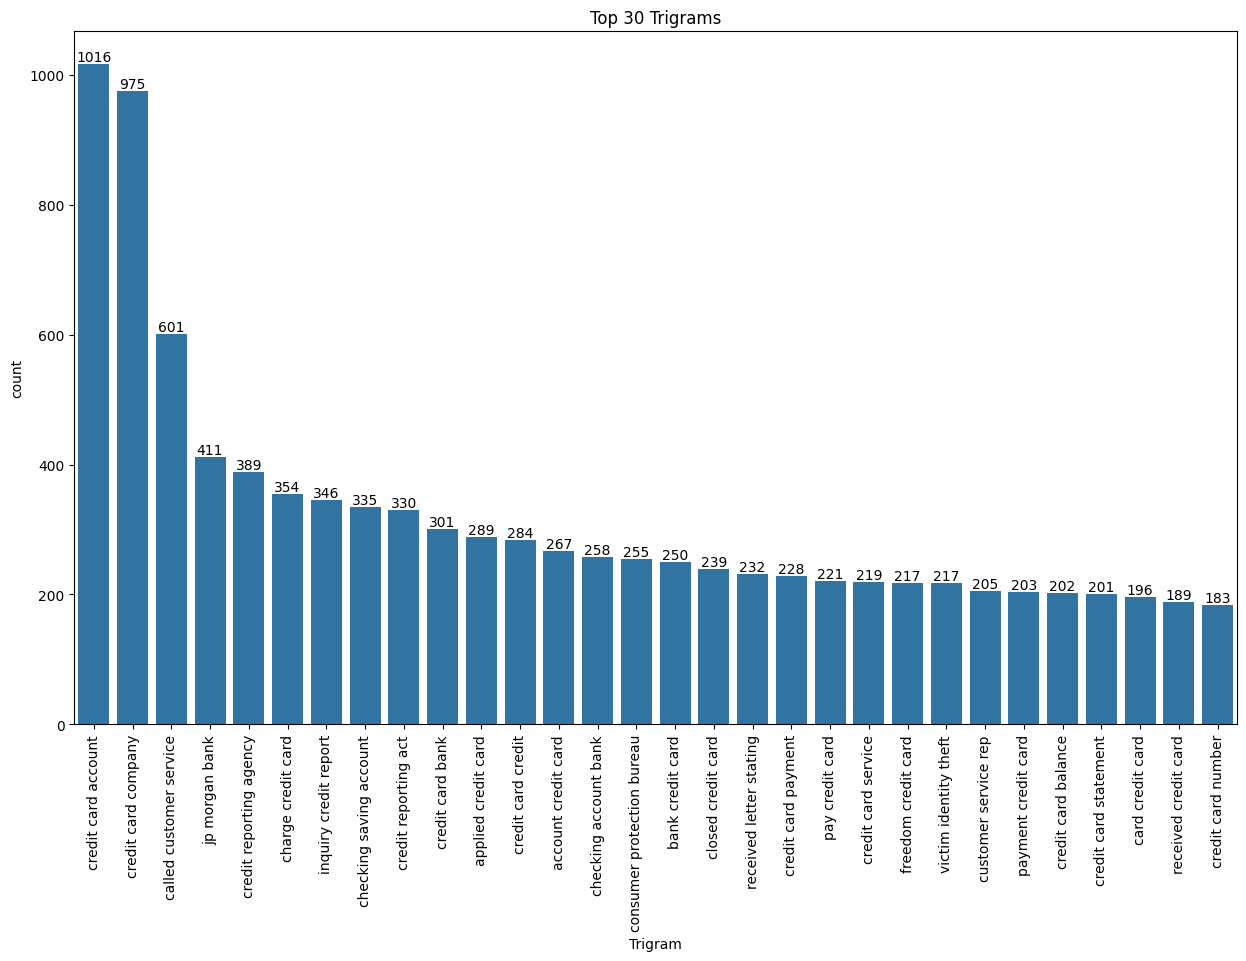

In [29]:
# Ploting trigram
df_temp=pd.DataFrame(top_30_tri,columns=['Trigram','count'])
plt.figure(figsize=(15,9))
ax=sns.barplot(data=df_temp,x='Trigram',y='count')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 30 Trigrams')
plt.show()

# Topic Modelling

## **Topic Modelling using NMF**

- ### **Non-Negative Matrix Factorization (NMF)**
It is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

- In this task we are performing the following:

 * Find the best number of clusters
 * Apply the best number to create word clusters
 * Inspect & validate the correction of each cluster wrt the complaints
 * Correct the labels if needed
 * Map the clusters to topics/cluster names

In [30]:
tfidf=TfidfVectorizer(stop_words='english')
tf_mat=tfidf.fit_transform(data_clean['pos_text'])

In [31]:
from sklearn.decomposition import NMF

Based on the Business needs we will decide the number of components(Clusters) we want:
* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others

Here 5 are required

In [34]:
# Using NMF
n=5
nmf=NMF(n_components=n,random_state=12)
W1=nmf.fit_transform(tf_mat)
H1=nmf.components_

In [47]:
# For each topic we will print 20 words --------- Manaual Topic Modelling
topics=[]
vocab=tfidf.get_feature_names_out()
for topic in H1:
  sorted_index=np.argsort(topic)
  top_words=[vocab[i] for i in sorted_index[:-20-1:-1]]
  topics.append(' '.join(top_words))

In [48]:
topics

['account bank check money fund checking deposit closed told branch day said called business deposited number transfer went saving opened',
 'credit card report inquiry account reporting score company bureau debt applied limit closed information application removed letter year balance opened',
 'loan mortgage home modification property year rate letter bank time house sale foreclosure document jp debt information help refinance sent',
 'charge card transaction dispute claim fraud fee merchant charged called service received told time said refund day phone company statement',
 'payment balance fee month paid pay statement day time auto date charged account credit year making mortgage paying car set']

#### Manually chosing topic:

* Credit card / Prepaid card -----------1
* Bank account services-----------------0
* Theft/Dispute reporting --------------3
* Mortgages/loans-----------------------2
* Others-----------------4


In [58]:
# Choosing the best topic based on the weights in each Documents
col_name=['Topic_'+str(i) for i in range(nmf.n_components)]
row_name=['Row_'+str(i) for i in range(len(data_clean['pos_text']))]
df_topic=pd.DataFrame(np.round(W1,3),columns=col_name,index=row_name)
df_topic.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
Row_0,0.018,0.011,0.023,0.008,0.006
Row_1,0.010,0.014,0.006,0.015,0.003
Row_2,0.000,0.043,0.001,0.004,0.000
Row_3,0.018,0.056,0.021,0.011,0.000
Row_4,0.078,0.000,0.000,0.000,0.002


In [61]:
# Getting significant topic in each row/complaint
significant_topic=np.argmax(df_topic,axis=1)
df_topic['Topic_No']=significant_topic
df_topic.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_No
Row_0,0.018,0.011,0.023,0.008,0.006,2
Row_1,0.010,0.014,0.006,0.015,0.003,3
Row_2,0.000,0.043,0.001,0.004,0.000,1
Row_3,0.018,0.056,0.021,0.011,0.000,1
Row_4,0.078,0.000,0.000,0.000,0.002,0


In [65]:
# Extracting the required columns
data_clean['Topic']=significant_topic

# Mapping the names to integer for verification
mapping={
    0:'Bank account services',
    1:'Credit card / Prepaid card',
    2:'Mortgages/loans',
    3:'Theft/Dispute reporting',
    4:'Others'
}
data_clean['Topic_Name']=data_clean['Topic'].map(mapping)
data_clean.head()

,category,complaint_text,lemma,pos_text,len,Topic,Topic_Name
1,Debt collection + Credit card debt,good morning my name is and i appreciate it if you could help me put a stop to bank cardmember services \nin i wrote to asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\n account thanks in advance for your help,good morning appreciate help stop bank cardmember service wrote asking debt verification sent statement acceptable asking bank validate debt instead receiving mail month attempting collect debt right know information consumer account thanks advance help,morning appreciate help stop bank cardmember service wrote asking debt verification sent statement asking bank debt receiving month attempting debt right know information consumer account thanks advance help,436,2,Mortgages/loans
2,Credit card or prepaid card + General-purpose credit card or charge card,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,upgraded card told agent upgrade anniversary date change turned agent giving wrong information order upgrade account changed anniversary date consent recording agent misled,card told agent date change turned giving information order upgrade account changed date consent recording agent misled,305,3,Theft/Dispute reporting
10,"Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,card reported fraudulent application submitted identity consent fraudulently obtain service extend credit verifying identity applicant,card reported application submitted identity consent obtain service extend credit verifying identity applicant,204,1,Credit card / Prepaid card
11,"Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to bank i then immediately contacted bank within no more than of getting the notification on the screen and i was told by the representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to pur the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the representative did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,trying book ticket came offer applied ticket applied reward card information offer minute notified screen decision immediately contacted referred bank immediately contacted bank getting notification screen told representative spo

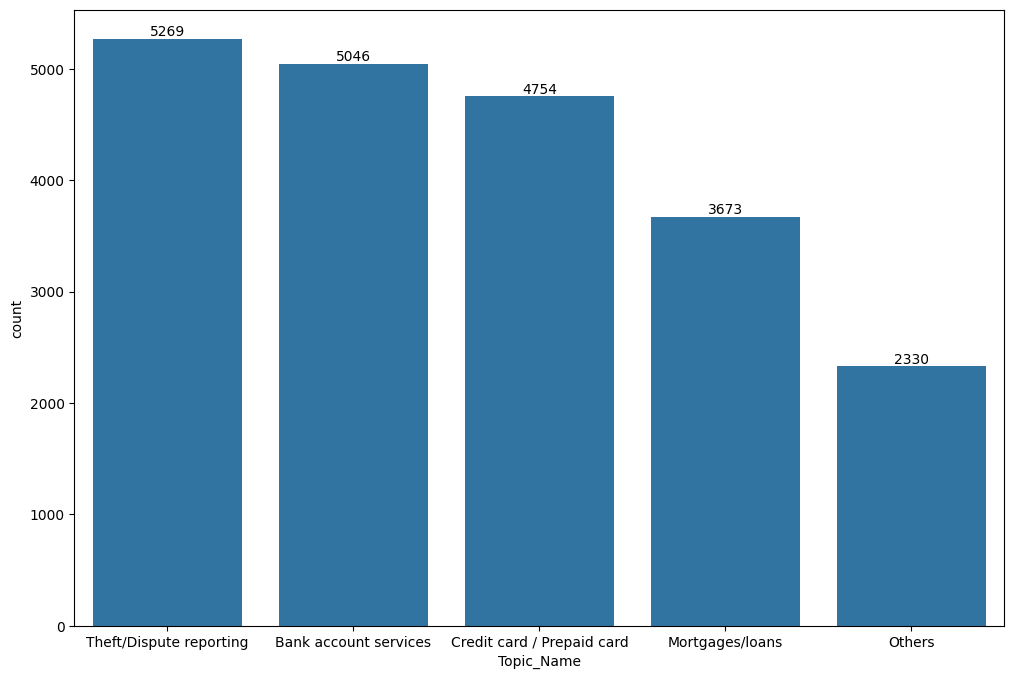

In [72]:
# Visualizing propoetions
plt.figure(figsize=(12,8))
fg=sns.countplot(data=data_clean,x=data_clean['Topic_Name'],order=data_clean['Topic_Name'].value_counts().index)
fg.bar_label(fg.containers[0])
plt.show()

# Pipeline for Preprocessing and model building

In [87]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay,confusion_matrix

In [75]:
# Train Test split
x_train,x_test,y_train,y_test=train_test_split(data_clean['pos_text'],data_clean['Topic'],test_size=0.2,stratify=data_clean['Topic'])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16857,)
(16857,)
(4215,)
(4215,)


In [96]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'MultinomialNB': MultinomialNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [101]:
param_grid = {
    'LogisticRegression': {
        'clf__C': [0.01, 0.1, 0.5],
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs'],
        'clf__max_iter': [1000],
        'clf__class_weight': [None, 'balanced']
    },

    'RandomForest': {
        'clf__n_estimators': [100],
        'clf__max_depth': [20],
        'clf__min_samples_split': [10],
        'clf__min_samples_leaf': [5],
        'clf__max_features': ['sqrt']
    },

    'MultinomialNB': {
        'clf__alpha': [1.0]
    },

    'AdaBoost': {
        'clf__n_estimators': [50],
        'clf__learning_rate': [1.0]
    }
}


In [109]:
results = []
best_model_pipeline = None
best_f1 = 0

for name, clf in classifiers.items():
    print(f"\n{name}:")

    # Pipeline with TF-IDF
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', clf)
    ])

    # GridSearchCV
    grid = GridSearchCV(pipe, param_grid[name], cv=skf, scoring='f1_weighted', n_jobs=-1)
    grid.fit(x_train, y_train)

    best_pipe = grid.best_estimator_

    # Predictions
    y_train_pred = best_pipe.predict(x_train)
    y_test_pred = best_pipe.predict(x_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')

    # Print metrics
    print(f"Best Params: {grid.best_params_}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)

    # Store results
    results.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'F1_Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Best_Params': grid.best_params_,
    })

    # Update best model pipeline
    if f1 > best_f1:
        best_f1 = f1
        best_model_pipeline = best_pipe


LogisticRegression:
Best Params: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Train Accuracy: 0.9869
Test Accuracy: 0.9632
F1-score: 0.9632
Precision: 0.9633
Recall: 0.9632
[[ 972    4    7   22    4]
 [   4  927    3    9    8]
 [   9    5  710    6    5]
 [  14   17   15 1003    5]
 [   2    2   10    4  448]]

RandomForest:
Best Params: {'clf__max_depth': 20, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}
Train Accuracy: 0.8302
Test Accuracy: 0.7796
F1-score: 0.7510
Precision: 0.8032
Recall: 0.7796
[[911  45   3  50   0]
 [ 23 821   5 101   1]
 [ 36  72 601  26   0]
 [ 86  68   3 897   0]
 [ 91 145  80  94  56]]

MultinomialNB:
Best Params: {'clf__alpha': 1.0}
Train Accuracy: 0.8001
Test Accuracy: 0.7609
F1-score: 0.7284
Precision: 0.7890
Recall: 0.7609
[[873  47   4  85   0]
 [ 47 756  10 138   0]
 [ 45  64 599  27   0]
 [ 73  37   3 941   0]
 

In [111]:
# Grid Results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1_Score', ascending=False)
results_df

,Model,Train_Accuracy,Test_Accuracy,F1_Score,Precision,Recall,Best_Params
0,LogisticRegression,0.986949,0.963227,0.963225,0.963262,0.963227,"{'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}"
3,AdaBoost,0.787566,0.789561,0.789955,0.795734,0.789561,"{'clf__learning_rate': 1.0, 'clf__n_estimators': 50}"
1,RandomForest,0.830219,0.779597,0.750998,0.803169,0.779597,"{'clf__max_depth': 20, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}"
2,MultinomialNB,0.800142,0.760854,0.728359,0.789005,0.760854,{'clf__alpha': 1.0}


In [112]:
def predict_ticket_class():
    cmnt = input("Enter your ticket complaint: ")
    pred = best_model_pipeline.predict([cmnt])[0]
    print("\nThis ticket is mapped under:", mapping[pred])

In [137]:
predict_ticket_class()

Enter your ticket complaint: I want to open a joint account for my family

This ticket is mapped under: Bank account services


In [139]:
predict_ticket_class()

Enter your ticket complaint: If I take one million loan from your bank How much interest rate I have to pay for a year

This ticket is mapped under: Mortgages/loans
